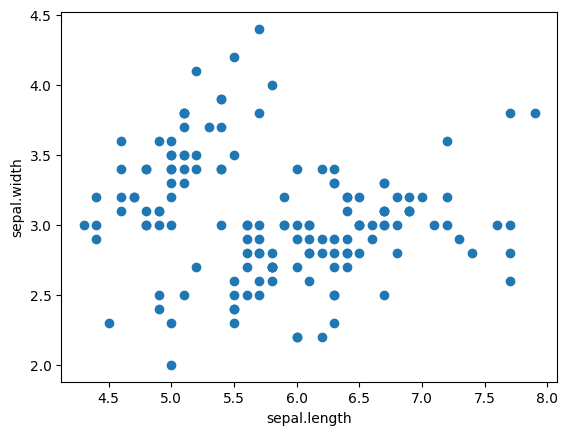

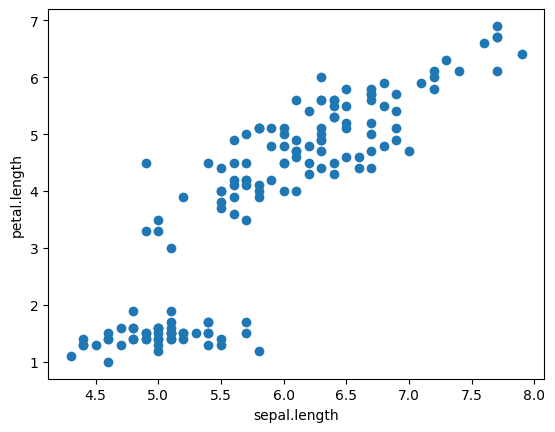

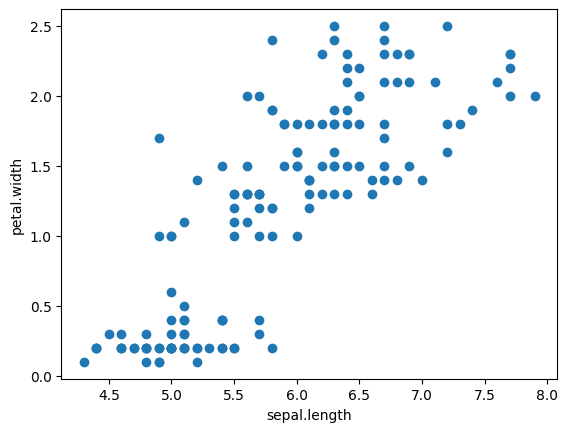

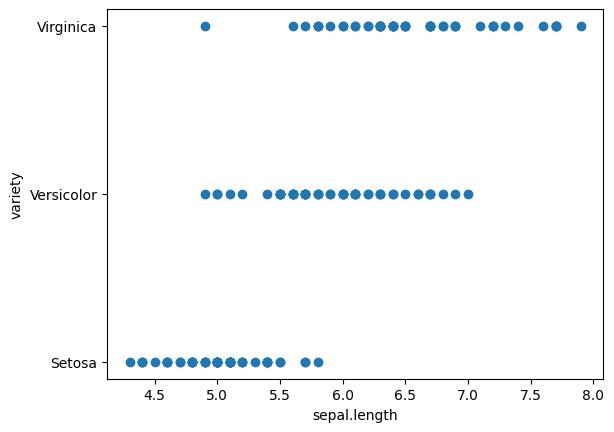

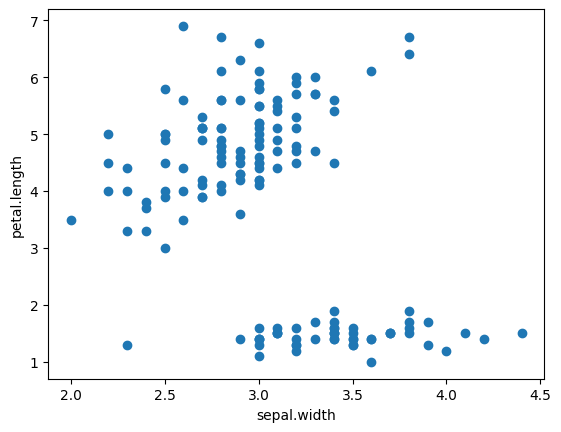

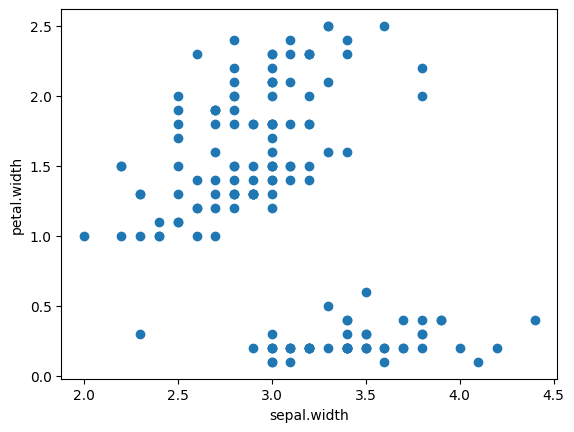

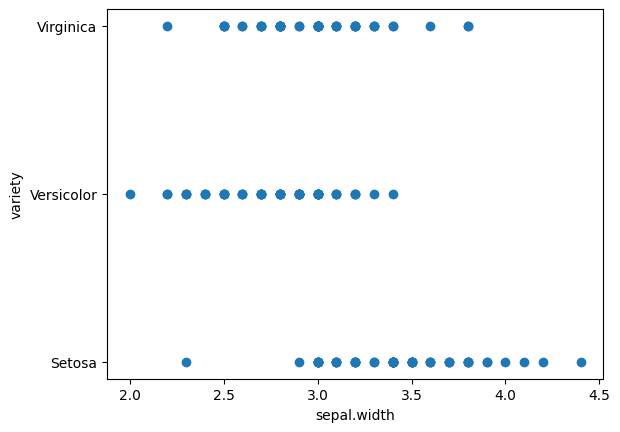

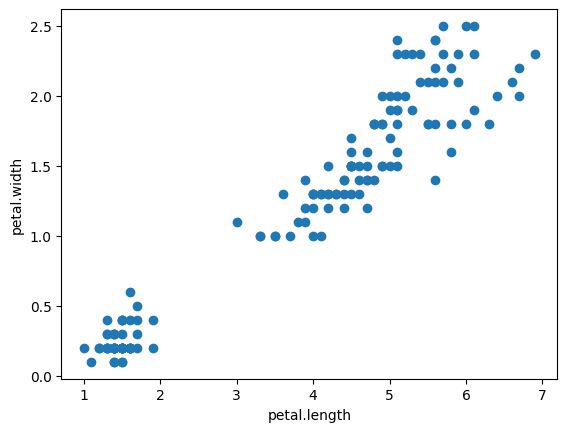

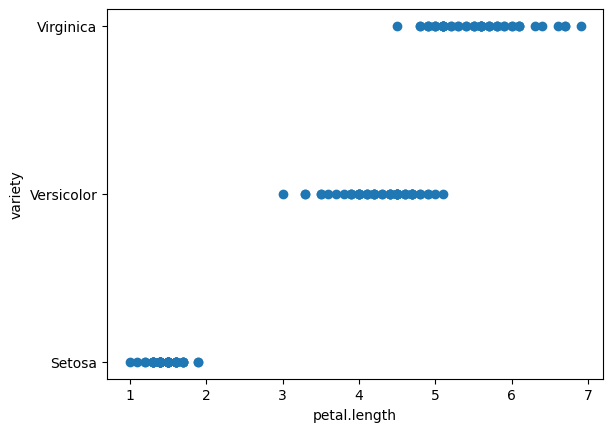

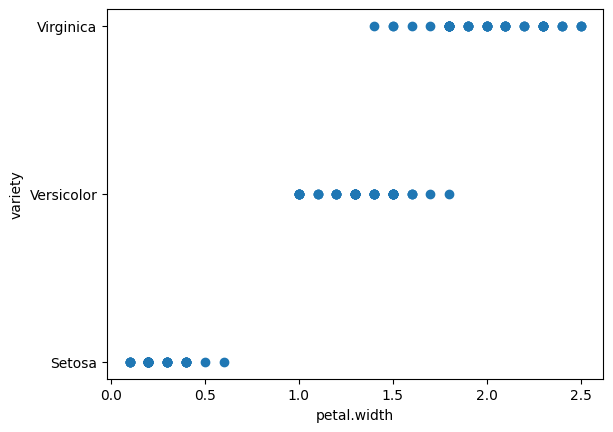

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

iris = pd.read_csv('./data/iris.csv')

combinations = list(itertools.combinations(iris.columns, 2))
# plotting all possible combinations of columns
for combination in combinations:
    plt.scatter(iris[combination[0]], iris[combination[1]])
    plt.xlabel(combination[0])
    plt.ylabel(combination[1])
    plt.show()

# Mixture Models Clustering
## Non probabilistic models
### K-means
*K-means* algorithm is an unsupervised machine learning technique that aims to partition $n$ observations into $k$ clusters ($k$ is a parameter of the algorithm) in such a way that every data point is allocated to the nearest cluster.
### DBSCAN
*Density-Based Special Clustering of Applications with Noise*, commonly know as DBSCAN, is another machine learning algorithm that belongs to unsupervised learning techniques.
### Hierarchical clustering
*Hierarchical clustering* is a method for clustering. It creates groups so that objects within a group are similar to each other and different from objects that belong to another group. 
Different approches to solve the Hierarchical problem include Agglomerative (bottom-up) and Divisive (top-down).
## Probabilistic models
### Bayesian Gaussian Mixture Models
### Bayesian Mixture Models with other distributions
### Mixture Models with EM
### Model comparisons